# Introduction to Pandas, Part 2


Let's start by loading the California baby names again.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns
# sns.set()

from IPython.display import display
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "../week_2/babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'STATE.CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.sample(5)

,State,Sex,Year,Name,Count
260552,CA,M,1948,Gearld,5
115393,CA,F,1990,Phoua,7
382305,CA,M,2014,Krish,28
162374,CA,F,2003,Dyanna,12
24421,CA,F,1947,Mercy,14


# Grouping and Aggregating



To understand how groupby works, consider the visual diagram below. The `groupby` function clusters rows from the original dataframe into groups (which I call subframes). The `agg` function then condenses each subframe into a single representative row using the provided function f.

![image](groupby_picture.png)

Let's actually build this DataFrame and play with it interactively to understand `groupby` a little better:

In [2]:
d = pd.DataFrame(dict(x=[3,1,4,1,5,9,2,5,6], y=[12,7,3,2,7,3,8,6,7]), index=list('ABCABCACB') )
d

,x,y
A,3,12
B,1,7
C,4,3
A,1,2
B,5,7
C,9,3
A,2,8
C,5,6
B,6,7


In [3]:
dgb = d.groupby(d.index)
dgb

In [4]:
dgb.groups

{'A': ['A', 'A', 'A'], 'B': ['B', 'B', 'B'], 'C': ['C', 'C', 'C']}

In [ ]:
dgb.groups['A']

In [ ]:
dgb.get_group('A')

---

To test your understanding, try to interpret the result of the code below.

In [ ]:
babynames[ ["Year","Count"] ].groupby("Year").agg(max).plot();

For reference, the first 5 values from the plot above are:

In [ ]:
babynames[ ["Year","Count"] ].groupby("Year").agg(sum).head(5)

## groupby warning

It is easy to get unexpected things.  Groupby is a powerful command that can do a lot of data manipulations but it is easy to get results you don't intend. 

Let's switch dataset quickly and look at the US Presidential elections again.  Suppose you want to know the best election result that each political party achieved.  

In [ ]:
elections = pd.read_csv("elections.csv")
elections.sample(5)

We have to be careful when using aggregation functions. For example, the code below might be misinterpreted to say that Woodrow Wilson ran for election in 2016. Why is this happening?

In [ ]:
elections.groupby("Party").agg(max).head(10)

### groupby fix

Next we'll write code that properly returns _the best result by each party_. That is, each row should show the Year, Candidate, Popular Vote, Result, and % for the election in which that party saw its best results (rather than mixing them and treating every column independently as in the example above), here's what the first rows of the correct output should look like:


In [ ]:
elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.head(5)

We used the agg(max) method to  combine above. Instead, now that we have a sorted table it is now simply a matter of taking the first() row and ignoring all the others.    

In [ ]:
    
elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.groupby("Party").first()

You'll soon discover that with Pandas' rich tool set, there's typically more than one way to get to the same answer. Each approach has different tradeoffs in terms of readability, performance, memory consumption, complexity and more.  It will take some experience for you to develop a sense of which approach is better for each problem, but you should in general try to think if you can at least envision a different solution to a given problem, especially if you find your current solution to be particularly convoluted or hard to read.


---

## Other groupby Features

### groupby.size()

In [ ]:
elections.groupby("Party")

In [ ]:
#size returns a Series giving the size of each group
elections.groupby("Party").size().head(15)

### groupby.filter()

In [ ]:
# filter gives a copy of the original DataFrame where row r is included
# if its group obeys the given condition
#
# Note: Filtering is done per GROUP, not per ROW.
elections.groupby("Year").filter(lambda sf: sf["%"].max() < 45)

In [ ]:
for i, (n, g) in enumerate(elections.groupby("Party")):
    print(n)
    display(g.head(2))
    if i>3: break

### groupby.sum(), groupby.mean(), etc.

As an alternative to groupby.agg(sum), we can also simply do groupby.sum().

In [ ]:
elections.groupby("Year").agg(sum).head()

In [ ]:
elections.groupby("Year").sum().head()

The same applies for many other common operations.

In [ ]:
elections.groupby("Year").agg(max).head()

In [ ]:
elections.groupby("Year").max().head()

In [ ]:
#elections.groupby("Year").mean().head()
elections.groupby("Year").median().head()
#elections.groupby("Year").max().head()

# Grouping by more than one thing
# Hierarchical indexing

Groupby() is not just limited to 1 column name you can create an index with multiple columns too. 





In [ ]:
babynames.groupby(["Year", "Sex"]).agg(sum).head(6)

In [ ]:
babynames.groupby(["Sex", "Year"]).agg(sum).head(6)

Suppose we want to build a table showing the total number of babies born of each sex in each year. One way is to groupby using both columns of interest.

In [ ]:
babynames.groupby(["Year", "Sex"]).agg(sum).head(6)

#Slicing

In order to select things in the multi index you need to use python "slice" syntax.  We did that last week.  But it gets fiddly with a multi index. 

Remember how we could use start:end to select a range?  You can do the same with a multi index.   But it's funky because a multiple index has multiple things.   


In [7]:
babyGrouped = babynames.groupby(["Year", "Sex"],).agg(max)





In [8]:
#Slice Example
babyGrouped.loc[ (2010,'M') ,slice(None)]

babyGrouped.loc[ (2010,'M'):(2012,'F') ,slice(None)]


State   Name  Count
Year Sex                    
2010 M      CA   Zyon   3355
2011 F      CA  Zyrah   3569
     M      CA  Zyler   3171
2012 F      CA   Zyra   3644

In [9]:
#Cross Section
babyGrouped.xs('F',level='Sex')

,State,Name,Count
Year,,,
1910,CA,Yvonne,295
1911,CA,Zelma,390
1912,CA,Yvonne,534
1913,CA,Zelma,584
1914,CA,Zelma,773
...,...,...,...
2018,CA,Zyra,2751
2019,CA,Zyra,2608
2020,CA,Zyrah,2353


## Resetting the index

Sometimes instead of using the multi index it's easier to just reset the index.  That puts the index values back into the columns. 

### WARNING Output vs. changing things

Most of these commands are not -changing- the dataframe.  You need to specifically do that. 

In [ ]:
babyGrouped.reset_index()


In [10]:
babyGrouped

State     Name  Count
Year Sex                      
1910 F      CA   Yvonne    295
     M      CA  William    237
1911 F      CA    Zelma    390
     M      CA   Willis    214
1912 F      CA   Yvonne    534
...        ...      ...    ...
2020 M      CA     Zyon   2630
2021 F      CA     Zyra   2402
     M      CA    Zyrus   2613
2022 F      CA     Zyra   2178
     M      CA     Zyon   2610

[226 rows x 3 columns]

In [11]:
babyGroupedReset = babyGrouped.reset_index()
babyGrouped.reset_index(inplace=True)

## EZ plotting

Pandas has a some built in plotting functions that can be used to get a quick view on the data.   They only create simple plots and they don't have powerful features like the Seaborn package we will learn later.  They can be fairly simplistic and not visual appealing and difficult for someone who is not familiar with the dataset to interpret.  They aren't really publication/report quality.  But they are fairly useful when you are doing data expoloration and just want a quick visual representation.   

<Axes: >

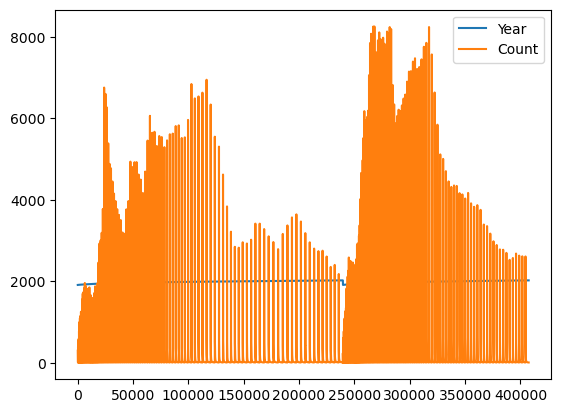

In [13]:
#Let's try just plotting our babynames dataset:
babynames.plot()

Woah.  What is that?  Well it's just plotting the series by the index.   The index is just the raw line of the dataset.   It gives a quick view.  But it's totally un-interpretable. 

What might be more useful?   Well we have an variable "year" in our dataset.  Let's plot the data 

<Axes: xlabel='Year'>

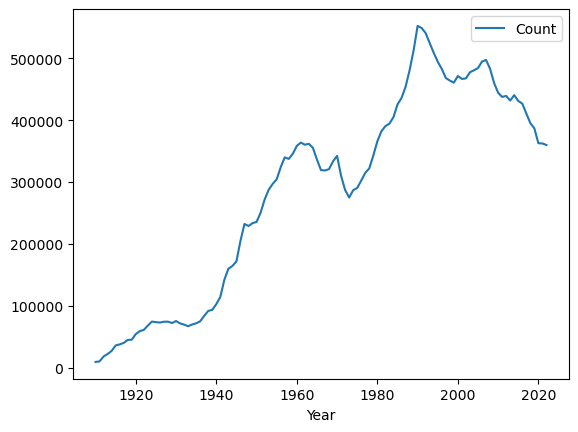

In [14]:
#Plotting by year
#First group by "Year" then take the sum of al the counts ()
babynames.groupby(["Year"]).agg(sum).plot()

Let's look at what went into that dataset to plot:

In [21]:
#Let's take a look at the first 10 rows of our dataset
babynames.groupby(["Year"]).agg(sum).head(10)

,State,Sex,Name,Count
Year,,,,
1910,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,MaryHelenDorothyMargaretFrancesRuthEvelynAlice...,9163
1911,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,MaryDorothyHelenMargaretRuthFrancesAliceEvelyn...,9983
1912,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,MaryDorothyHelenMargaretRuthFrancesAliceVirgin...,17946
1913,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,MaryDorothyHelenMargaretRuthFrancesVirginiaEli...,22094
1914,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,MaryDorothyHelenMargaretRuthFrancesEvelynVirgi...,26926
1915,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,MaryDorothyHelenMargaretRuthVirginiaFrancesEve...,35835
1916,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,MaryDorothyMargaretHelenRuthFrancesVirginiaEve...,37501
1917,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,MaryDorothyHelenMargaretVirginiaRuthFrancesEve...,39916
1918,CACACACACACACACACACACACACACACACACACACACACACACA...,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...,MaryDorothyMargaretHelenVirginiaFrancesRuthBar...,44692


Ok So that's crazy right?   What is going on?  sum() is like "+"  and we've used "+" alot for strings in previous classes.   What + and a string does is to concatenate (stick together) the strings. Creating basically a nightmare unusable value in the column. Luckily when you go to "plot" it only plots numeric values, it ignores the strings. 
Let's be a bit more direct and choose a specific outcome column


In [27]:
#Let's make the same plot but only select the "Count column"
#Note you I enclosed "Count" in []  so it's [ ["Count"] ]  that returns a dataframe instead of a series.  It works for a series as well
#But you lose the column label so that can get confusing. 
babynames.groupby(["Year"])[["Count"]].agg(sum)

,Count
Year,
1910,9163
1911,9983
1912,17946
1913,22094
1914,26926
...,...
2018,395436
2019,386996
2020,362882


<Axes: xlabel='Year'>

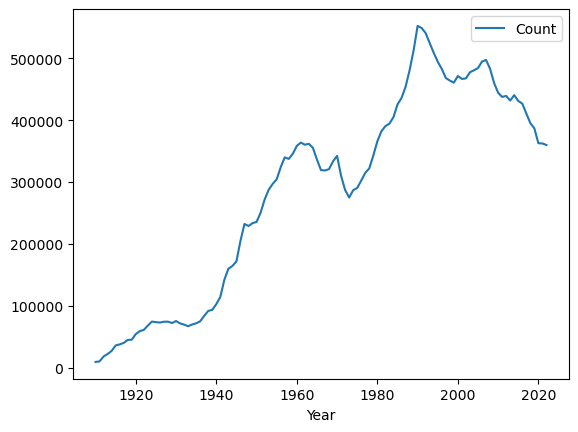

In [28]:
#Now let's make the plot. 

babynames.groupby(["Year"])[["Count"]].agg(sum).plot()


## Pivot Tables

Pivot tables are another way to reformat and group data.  They are a different syntax that some find more natural. Especially if you've used the function in Excel before.  When grouping more than one thing they can be easier to work with.    

Suppose we want to build a table showing the total number of babies born of each sex in each year. One way is to groupby using both columns of interest.

In [ ]:
babynames.groupby(["Year", "Sex"]).agg(sum).head(6)

Another way is to use a "Pivot Table".   

In [ ]:
babynames_pivot = babynames.pivot_table( index='Year', columns='Sex', values=['Count'], aggfunc=np.max, )
babynames_pivot.head()

THat line of code is getting complicated and hard to read.   Let's use formatting to make it simpler.  Below is exactly the same code

In [ ]:
babynames_pivot = babynames.pivot_table(
    index='Year', # the rows (turned into index)
    columns='Sex', # the column values
    values=['Count'], # the field(s) to processed in each group
    aggfunc=np.sum, # group operation
)
babynames_pivot.tail()

Further, with data structured this way making comparisons plots becomes straightforward.



<Axes: xlabel='Year'>

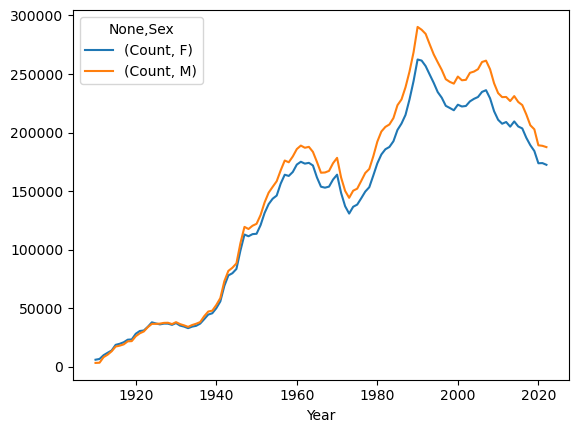

In [18]:
babynames_pivot = babynames.pivot_table(
    index='Year', # the rows (turned into index)
    columns='Sex', # the column values
    values=['Count'], # the field(s) to processed in each group
    aggfunc=np.sum, # group operation
)
babynames_pivot.plot()



Notice anything in that plot?

### Excercises:  

## Grouping

More careful look at the most popular 2018 name in California.
In last weeks tasks for popular names, we didn't take into account the unlikely possibility that the most popular name was actually spread across both birth sexes. For example, what if in the table below it turns out that there were 300 female Noahs born in CA in 2018? In that case, Noah would actually be the most popular.

Since our queries are getting pretty long, I've stuck them inside parentheses which allows us to spread them over many lines.

In [20]:
#
# ( <--- start a a group of code. 
# firstthing   <---- start the first experssion
# .nextFunction() <--- do something
# .anotherFunction() <--- do something else
# ) <--- end the group

(
babynames[babynames["Year"] == 2018]  # Select the rows where "year" is 2018
    .sort_values(by = "Count", ascending = False)  # sort the names by the count
    .head(5)  # take the top 5
)

,State,Sex,Year,Name,Count
221194,CA,F,2018,Emma,2751
393150,CA,M,2018,Noah,2572
221195,CA,F,2018,Mia,2504
221196,CA,F,2018,Olivia,2472
393151,CA,M,2018,Liam,2415


Try to add a single line to the operation above so that each row represents the sum of both male and female babies born in 2018 with the same name. To do this, fill in the ??? below.

Don't change anything else.   Just put in two lines starting with .  Hint you think about what you need to do and use what we introduced today.  

In [ ]:
(
babynames[babynames["Year"] == 2018]
    #.???
    #.???   
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

Here is another example of AI generated code.   

In [ ]:

#AI Response 1: Microsoft CO-Pilot
#Here is an AI generate coding for the question: "Can you plot the percentage of babies named "John" over time?"
#This is wrong.  Run the code and determine why? 

#Can you plot the percentage of babies named "John" over time?
babynames[babynames["Name"] == "John"].groupby("Year").agg(sum).plot()



Can you make a table that lists the #1 names for the years 2000-2010?

How many  babys in total were born in 1940? in 2020?

Can you determine the most used name in total over all time?  For males and females seperately?  What does this tell you?
 


Before we were looking at the differences in popularity.  Considering the total numbers of babys born does this have any implications for how we should inpterpret our previous analysis above? Starting from the code from above to plot the total number of babies.
```python
#Try ploting this use .plot() instead of selecting a year
(
    babynames
    .groupby(["Year"])[["Count"]]
    .agg(sum)
    .plot()
)

```

Can you make a plot of the number of unique names given over the years? This one is harder and requires using a function we didn't use above, the nunique() function counts the number of unique entries in a list. 

Given the most poopular names you found above, Can you plot the number of babies using those names over time?  

What other things can you think of?   Try and think of a question. 



